In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Mon Oct 26 10:54:12 2019

@author: rupesh
"""

'\nCreated on Mon Oct 26 10:54:12 2019\n\n@author: rupesh\n'

## Roadmaps

Four phases of machine learning
1. [**Data Processing**](#data_processing)
2. [**Feature Engineering and selection**](#feature)
3. [**Modeling**](#model)
4. [**Optimization**](#optimize)

### Imports

In [2]:
# Data manipulation
import numpy as np
import pandas as pd

# Visulization
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/sawrupesh04/DataCamp/master/Machine%20Learning/Unsupervised-learning/dataset/Grains/seeds.csv')

In [4]:
df.head()

,15.26,14.84,0.871,5.763,3.312,2.221,5.22,1
0,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
1,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
2,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
3,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
4,14.38,14.21,0.8951,5.386,3.312,2.462,4.956,1


Let's reset the columns

In [5]:
columns = df.columns
df.columns = range(df.shape[1])
df.loc[-1] = columns.values
df.index = df.index+1
df.sort_index(inplace=True)

In [6]:
df.head()

,0,1,2,3,4,5,6,7
0,15.26,14.84,0.871,5.763,3.312,2.221,5.22,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.905,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


<a id='data_processing'></a>
# Data Processing

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 210 entries, 0 to 209
Data columns (total 8 columns):
0    210 non-null object
1    210 non-null object
2    210 non-null object
3    210 non-null object
4    210 non-null object
5    210 non-null object
6    210 non-null object
7    210 non-null object
dtypes: object(8)
memory usage: 14.8+ KB


In [8]:
df.describe()

,0,1,2,3,4,5,6,7
count,210.00,210.00,210.0000,210.000,210.000,210.0,210.000,210
unique,194.00,170.00,186.0000,188.000,185.000,208.0,149.000,4
top,15.38,13.47,0.8823,5.236,3.026,2.7,5.001,3
freq,3.00,4.00,3.0000,3.000,3.000,2.0,6.000,70


In [9]:
col = {}
for i in range(8):
    if i==7:
        col[i] = 'int64'
    else:
        col[i]='float64'

In [10]:
df = df.astype(col)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 210 entries, 0 to 209
Data columns (total 8 columns):
0    210 non-null float64
1    210 non-null float64
2    210 non-null float64
3    210 non-null float64
4    210 non-null float64
5    210 non-null float64
6    210 non-null float64
7    210 non-null int64
dtypes: float64(7), int64(1)
memory usage: 14.8 KB


In [12]:
df.head()

,0,1,2,3,4,5,6,7
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [13]:
X = df.drop(7, axis=1)
y = df[7]

In [14]:
X.shape

(210, 7)

In [15]:
y.shape

(210,)

<a id='feature'></a>
# Feature Engineering and Selection

In [16]:
# model selection
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

<a id='model'></a>
# Modeling

In [18]:
# Model
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import completeness_score

In [19]:
model = KMeans(n_clusters=3)

In [20]:
model.fit(X, y)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [21]:
model.inertia_

587.3186115940427

In [22]:
predict = model.labels_

### How many cluster for dataframe

In [23]:
ks = range(1, 6)
inertias = []
for k in ks:
    # create a KMeans instance with k clusters
    model = KMeans(n_clusters=k)
    
    # fit the model
    model.fit(X, y)
    
    # append the inertia to the list of inertias
    inertias.append(model.inertia_)
    

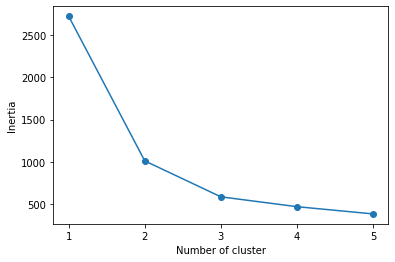

In [24]:
plt.plot(ks, inertias, '-o')
plt.xlabel('Number of cluster')
plt.ylabel('Inertia')
plt.xticks(ks)
plt.show()

Inertia decreases very slowly from 3 cluster to 4 cluster, so it look like 3 is good choice.

In the above plot, we know the 3 clusters is a good choice. Let's intialize KMeans model with 3 cluster

In [25]:
# Intialize the Kmean instance with three cluster
model = KMeans(n_clusters=3)

# Fit the model
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [26]:
# Get the predicted labels
labels = model.predict(X)

In [27]:
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0,
       0, 0, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

Grain samples comes from a mix 3 different grain varieties:
<ul>
    <li>Kama</li>
    <li>Rosa</li>
    <li>Canadian</li>
</ul>
In this notebook, cluster the grain samples into 3 clusters and compare the cluster to the grain varieties using
cross-tabulation

In [28]:
varieties = ['Kama wheat', 
             'Kama wheat', 
             'Kama wheat',
             'Kama wheat',
             'Kama wheat',
             'Kama wheat',
             'Kama wheat',
             'Kama wheat',
             'Kama wheat',
             'Kama wheat',
             'Kama wheat',
             'Kama wheat',
             'Kama wheat',
             'Kama wheat',
             'Kama wheat',
             'Kama wheat',
             'Kama wheat',
             'Kama wheat',
             'Kama wheat',
             'Kama wheat',
             'Kama wheat',
             'Kama wheat',
             'Kama wheat',
             'Kama wheat',
             'Kama wheat',
             'Kama wheat',
             'Kama wheat',
             'Kama wheat',
             'Kama wheat',
             'Kama wheat',
             'Kama wheat',
             'Kama wheat',
             'Kama wheat',
             'Kama wheat',
             'Kama wheat',
             'Kama wheat',
             'Kama wheat',
             'Kama wheat',
             'Kama wheat',
             'Kama wheat',
             'Kama wheat',
             'Kama wheat',
             'Kama wheat',
             'Kama wheat',
             'Kama wheat',
             'Kama wheat',
             'Kama wheat',
             'Kama wheat',
             'Kama wheat',
             'Kama wheat',
             'Kama wheat',
             'Kama wheat',
             'Kama wheat',
             'Kama wheat',
             'Kama wheat',
             'Kama wheat',
             'Kama wheat',
             'Kama wheat',
             'Kama wheat',
             'Kama wheat',
             'Kama wheat',
             'Kama wheat',
             'Kama wheat',
             'Kama wheat',
             'Kama wheat',
             'Kama wheat',
             'Kama wheat',
             'Kama wheat',
             'Kama wheat',
             'Kama wheat',
             'Rosa wheat',
             'Rosa wheat',
             'Rosa wheat',
             'Rosa wheat',
             'Rosa wheat',
             'Rosa wheat',
             'Rosa wheat',
             'Rosa wheat',
             'Rosa wheat',
             'Rosa wheat',
             'Rosa wheat',
             'Rosa wheat',
             'Rosa wheat',
             'Rosa wheat',
             'Rosa wheat',
             'Rosa wheat',
             'Rosa wheat',
             'Rosa wheat',
             'Rosa wheat',
             'Rosa wheat',
             'Rosa wheat',
             'Rosa wheat',
             'Rosa wheat',
             'Rosa wheat',
             'Rosa wheat',
             'Rosa wheat',
             'Rosa wheat',
             'Rosa wheat',
             'Rosa wheat',
             'Rosa wheat',
             'Rosa wheat',
             'Rosa wheat',
             'Rosa wheat',
             'Rosa wheat',
             'Rosa wheat',
             'Rosa wheat',
             'Rosa wheat',
             'Rosa wheat',
             'Rosa wheat',
             'Rosa wheat',
             'Rosa wheat',
             'Rosa wheat',
             'Rosa wheat',
             'Rosa wheat',
             'Rosa wheat',
             'Rosa wheat',
             'Rosa wheat',
             'Rosa wheat',
             'Rosa wheat',
             'Rosa wheat',
             'Rosa wheat',
             'Rosa wheat',
             'Rosa wheat',
             'Rosa wheat',
             'Rosa wheat',
             'Rosa wheat',
             'Rosa wheat',
             'Rosa wheat',
             'Rosa wheat',
             'Rosa wheat',
             'Rosa wheat',
             'Rosa wheat',
             'Rosa wheat',
             'Rosa wheat',
             'Rosa wheat',
             'Rosa wheat',
             'Rosa wheat',
             'Rosa wheat',
             'Rosa wheat',
             'Rosa wheat',
             'Canadian wheat',
             'Canadian wheat',
             'Canadian wheat',
             'Canadian wheat',
             'Canadian wheat',
             'Canadian wheat',
             'Canadian wheat',
             'Canadian wheat',
             'Canadian wheat',
             'Canadian wheat',
             'Canadian wheat',
             'Canadian wheat',
             'Canadian wheat',
             'Canadian wheat',
             'Canadian wheat',
             'Canadian wheat',
             'Canadian wheat',
             'Canadian wheat',
             'Canadian wheat',
             'Canadian wheat',
             'Canadian wheat',
             'Canadian wheat',
             'Canadian wheat',
             'Canadian wheat',
             'Canadian wheat',
             'Canadian wheat',
             'Canadian wheat',
             'Canadian wheat',
             'Canadian wheat',
             'Canadian wheat',
             'Canadian wheat',
             'Canadian wheat',
             'Canadian wheat',
             'Canadian wheat',
             'Canadian wheat',
             'Canadian wheat',
             'Canadian wheat',
             'Canadian wheat',
             'Canadian wheat',
             'Canadian wheat',
             'Canadian wheat',
             'Canadian wheat',
             'Canadian wheat',
             'Canadian wheat',
             'Canadian wheat',
             'Canadian wheat',
             'Canadian wheat',
             'Canadian wheat',
             'Canadian wheat',
             'Canadian wheat',
             'Canadian wheat',
             'Canadian wheat',
             'Canadian wheat',
             'Canadian wheat',
             'Canadian wheat',
             'Canadian wheat',
             'Canadian wheat',
             'Canadian wheat',
             'Canadian wheat',
             'Canadian wheat',
             'Canadian wheat',
             'Canadian wheat',
             'Canadian wheat',
             'Canadian wheat',
             'Canadian wheat',
             'Canadian wheat',
             'Canadian wheat',
             'Canadian wheat',
             'Canadian wheat',
             'Canadian wheat']

In [29]:
len(varieties)

210

In [30]:
# Create a dataframe with labels and varieties as columns
myFrame = pd.DataFrame({'labels': labels, 'varieties': varieties})

# Create cross-tab
ct = pd.crosstab(myFrame['labels'], myFrame['varieties'])

In [31]:
ct

varieties,Canadian wheat,Kama wheat,Rosa wheat
labels,,,
0,2,60,10
1,0,1,60
2,68,9,0


The cross-tabulation shows that the 3 varieties of grain seperated really with  clusters

## Hierarchical sample of the Data

Scipy <b>linkage()</b> function perform hierarchical clutering on the sample data. Using <b>linkage()</b> function, 
we get the hierarchical cluster of the sample data and use <b>dendrogram()</b> to visualize the result.

In [32]:
from scipy.cluster.hierarchy import linkage, dendrogram

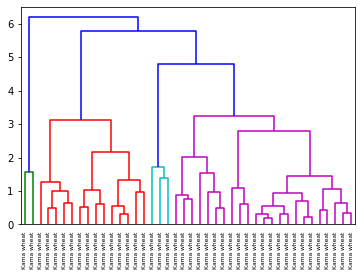

In [33]:
# Let's get the first 42 samples to see the clear visulization
samples = X[:42]

# calculate linkages
merging = linkage(samples, method='complete')

#plt.figure(figsize=(30, 30))
# plot the dendrogram
dendrogram(merging,
          labels=varieties[:42],
          leaf_rotation=90,
          leaf_font_size=6)

plt.show()

 Now, use the fcluster() function to extract the cluster labels for this intermediate clustering, and compare the labels with the grain varieties using a cross-tabulation.

In [34]:
from scipy.cluster.hierarchy import fcluster

In [35]:
labels = fcluster(merging, 6, criterion='distance')

In [36]:
labels.shape

(42,)

In [37]:
newDf = pd.DataFrame({'labels': labels, 'varieties': varieties[:42]})

In [38]:
pd.crosstab(newDf['labels'], newDf['varieties'])

varieties,Kama wheat
labels,
1,2
2,40


### Let's get the corelation between the features

In [90]:
df.head()

,0,1,2,3,4,5,6,7
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [94]:
# Let get the width and length of the grain dataset from df variable
# in "df" 3-column is length and 4-column width
grains_width_length = df[[4, 3]].values

width = grains_width_length[:, 0]
length = grains_width_length[:, 1]

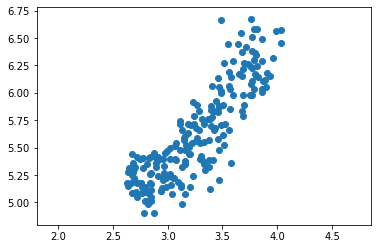

In [95]:
# Let's plot width vs length 
plt.scatter(width, length)
plt.axis('equal')
plt.show()

In [96]:
# Lets calculate the Pearson Correlation
from scipy.stats import pearsonr

corelation, pvalue = pearsonr(width, length)
print("Correlation between width and length:      >>   ", corelation)

Correlation between width and length:      >>    0.8604149377143466


We observed, length and width is highly correlated

# Let's Decorrelate with PCA(Principle Component Analysis)

In [98]:
# Let's import PCA from sklearn
from sklearn.decomposition import PCA

In [99]:
# Intiate PCA model
model = PCA()

# Let's apply .fit_transform to the model and assign to pca_features
pca_features = model.fit_transform(grains_width_length)

In [100]:
xs = pca_features[:, 0]
ys = pca_features[:, 1]

In [110]:
ys

array([ 4.48701536e-02, -1.04853394e-01, -2.76013257e-01, -2.87226133e-01,
       -2.14516232e-01, -1.96070646e-01, -4.21863576e-02, -1.66650003e-01,
        1.12533346e-01, -2.62395364e-02,  6.73928808e-02, -7.74647317e-02,
       -7.52873846e-02, -1.66510665e-02,  1.75694184e-02, -2.34590748e-01,
       -4.21318181e-01, -2.61320442e-01, -4.30192803e-01, -9.60472265e-02,
        1.18514214e-01,  3.22563195e-04, -1.97778454e-01, -9.03020125e-02,
        1.13018030e-01,  5.77271824e-03,  2.96505572e-02,  8.34891973e-02,
       -2.70198731e-02,  7.69858755e-02,  1.06582768e-01, -4.34273038e-03,
        1.12381094e-01,  5.57083022e-02, -2.99347942e-05, -1.22699614e-01,
       -3.17732911e-02, -1.96376721e-01, -5.05461242e-03, -1.78272815e-01,
       -1.00373201e-01, -9.99941473e-02, -2.69194811e-01,  5.31212157e-02,
       -1.88092810e-01, -8.17092704e-02, -5.70530607e-02, -1.28469221e-01,
       -7.83021121e-02,  3.20792963e-02, -3.81247563e-02, -1.05842828e-01,
        1.67248904e-01, -

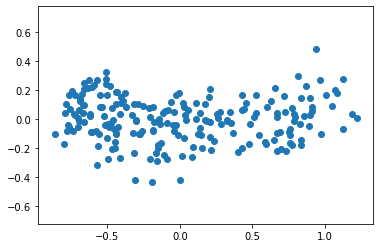

In [107]:
# Let's plot and compare with above visulization
plt.scatter(xs, ys)
plt.axis('equal')
plt.show()

In [108]:
# Let's again calculate the Pearson correlation
corelation, pvalue = pearsonr(xs, ys)
print("Correlation between width and length:      >>   ", corelation)

Correlation between width and length:      >>    1.0408340855860843e-16


### Let's find the variation in the dataset

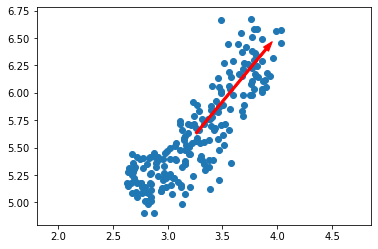

In [113]:
# Let's make the scatter plot for untransformed point
plt.scatter(width, length)

# Create PCA instance
model = PCA()

# fit the model
model.fit(grains_width_length)

# Get the mean of the first component
mean = model.mean_

# Get the first component
first_pc = model.components_[0, :]

# plot arrow on scatter plot and get the variation in the dataset
plt.arrow(mean[0], mean[1], first_pc[0], first_pc[1], color='red', width=0.02)

plt.axis('equal')
plt.show()

This is the direction in which gain data varies more.